In [1]:
from eval.eval import basic_eval, get_eval_data, robustness_main_task
from models.linear import LeastSquaresModel
from models.zero_model import ZeroModel
from function_classes.linear import LinearRegression

from torch.distributions.normal import Normal
import torch

from torch import nn


from torch import normal

/home/codespace/.python/current/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
m = Normal(torch.zeros((4, 100, 10)), torch.ones((4, 100 ,10))) #batch size, sequence_length, x_dim

config_data={'function_class':LinearRegression(m), "accuracy_func": nn.MSELoss(reduction="none"), "test_size": 10, "save_path": "eval/data/linear"}

evaluation=basic_eval(LeastSquaresModel(), config_data=config_data)

print(basic_eval(ZeroModel(), config_data))

{'accuracy': tensor([ 677.7089, 1065.6458, 1246.3547,  771.0237, 1460.6263, 1146.4271,
         703.9692,  943.0806,  802.2295,  621.6225,  930.9168,  704.1536,
         939.0023,  883.8372,  869.7448,  658.2814, 1115.0466,  677.4630,
        1235.2157,  648.2311,  664.1217,  788.1540,  883.0344, 1333.3350,
         637.3647,  814.9817,  898.9977,  864.6043,  815.2742,  710.4114,
         972.6764,  893.6008, 1101.7014,  754.2412, 1199.5334,  937.2726,
         905.3176, 1015.2043, 1105.7666,  717.0802,  810.0365, 1147.3225,
        1079.8257,  752.3673,  776.5387,  704.2259,  792.1331,  806.6724,
         744.4263,  816.4388, 1245.2865,  508.8720,  583.8367,  864.8716,
         656.7281, 1122.2927,  664.7149,  918.2137, 1087.9270, 1007.6214,
        1073.8737,  618.9294,  976.7804,  844.3969, 1202.2957, 1044.9272,
         943.0067,  955.4432, 1319.7532, 1134.5665,  634.5939, 1300.7444,
         600.8800,  612.1929,  821.0672, 1311.2443,  781.4716,  761.7820,
        1564.9020, 1005.4

dict_keys(['accuracy', 'std', 'std_mean', 'max', 'min', 'quantile0.01', 'quantile0.05', 'quantile0.1', 'quantile0.25', 'quantile0.5', 'quantile0.75', 'quantile0.9', 'quantile0.95', 'quantile0.99'])


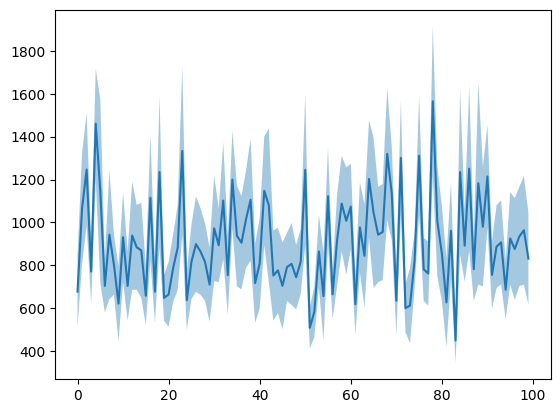

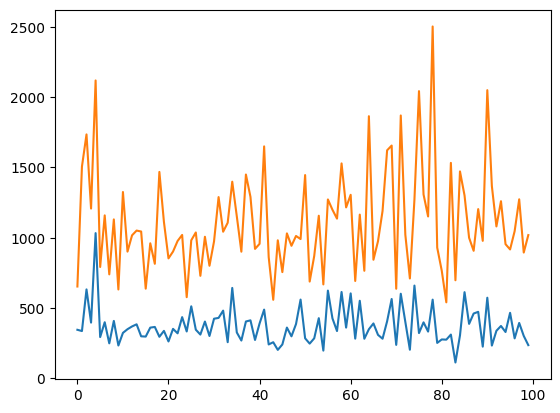

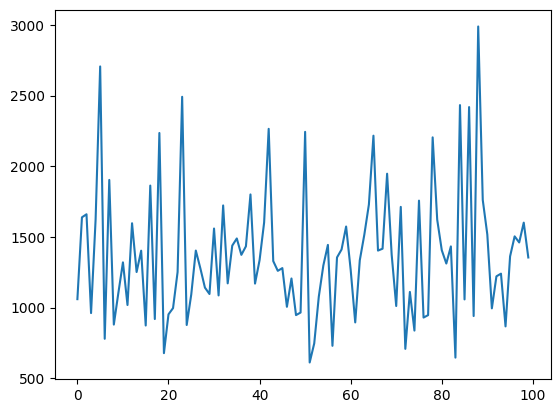

In [6]:
import matplotlib.pyplot as plt

import numpy as np

evaluation=get_eval_data(config_data["save_path"],["zero_model"]).get("zero_model")

print(evaluation.keys())

plt.plot(evaluation.get("accuracy"))

plt.fill_between(range(len(evaluation.get("accuracy"))), evaluation.get("accuracy")-evaluation.get("std_mean"), evaluation.get("accuracy")+evaluation.get("std_mean"), alpha=0.4)

plt.show()

plt.plot(evaluation.get("quantile0.5") )

plt.plot(evaluation.get("quantile0.75"))

plt.show()

plt.plot(evaluation.get("std"))

In [3]:
from eval.eval import expressivity_main_task

m = Normal(torch.zeros((4, 100, 10)), torch.ones((4, 100 ,10))) #batch size, sequence_length, x_dim

config_data={'function_class':LinearRegression(m), "accuracy_func": nn.MSELoss(reduction="none"), "test_size": 10}

evaluation=expressivity_main_task(LeastSquaresModel(), config_data.get('accuracy_func'))

#print(basic_eval(ZeroModel(), config_data))

TypeError: CombinedDistribution.sample() missing 1 required positional argument: 'sample_shape'

In [27]:
m = Normal(torch.zeros((4, 100, 10)), torch.ones((4, 100 ,10))) #batch size, sequence_length, x_dim

x_noise=lambda scale: lambda xs: xs+ Normal(torch.zeros(4, 100, 10), torch.ones(4, 100, 10)*scale).sample()

y_noise=lambda scale: lambda ys: ys+ Normal(torch.zeros(4, 100), torch.ones(4, 100)*10*scale).sample() #should scale this to compensate for difference indimension


config_data={'function_class':LinearRegression(m), "accuracy_func": nn.MSELoss(reduction="none"), "test_size": 10, "save_path": "eval/data/linear", "noise_x_func": x_noise, "noise_y_func": y_noise}

evaluation=robustness_main_task(LeastSquaresModel(), config_data=config_data)

#print(basic_eval(ZeroModel(), config_data)) 

0 ['scaled_x', 0.125]
1 ['scaled_y', 0.125]
2 ['scaled_x', 0.25]
3 ['scaled_y', 0.25]
4 ['scaled_x', 0.5]
5 ['scaled_y', 0.5]
6 ['scaled_x', 2]
7 ['scaled_y', 2]
8 ['scaled_x', 4]
9 ['scaled_y', 4]
10 ['scaled_x', 8]
11 ['scaled_y', 8]
12 ['noise_x', 0.0625]
13 ['noise_y', 0.0625]
14 ['noise_x', 0.125]
15 ['noise_y', 0.125]
16 ['noise_x', 0.25]
17 ['noise_y', 0.25]
18 ['noise_x', 0.5]
19 ['noise_y', 0.5]
20 ['noise_x', 1]
21 ['noise_y', 1]


dict_keys(['scaled_x_0.125_accuracy', 'scaled_x_0.125_std', 'scaled_x_0.125_std_mean', 'scaled_x_0.125_max', 'scaled_x_0.125_min', 'scaled_x_0.125quantile0.01', 'scaled_x_0.125quantile0.05', 'scaled_x_0.125quantile0.1', 'scaled_x_0.125quantile0.25', 'scaled_x_0.125quantile0.5', 'scaled_x_0.125quantile0.75', 'scaled_x_0.125quantile0.9', 'scaled_x_0.125quantile0.95', 'scaled_x_0.125quantile0.99', 'scaled_y_0.125_accuracy', 'scaled_y_0.125_std', 'scaled_y_0.125_std_mean', 'scaled_y_0.125_max', 'scaled_y_0.125_min', 'scaled_y_0.125quantile0.01', 'scaled_y_0.125quantile0.05', 'scaled_y_0.125quantile0.1', 'scaled_y_0.125quantile0.25', 'scaled_y_0.125quantile0.5', 'scaled_y_0.125quantile0.75', 'scaled_y_0.125quantile0.9', 'scaled_y_0.125quantile0.95', 'scaled_y_0.125quantile0.99', 'scaled_x_0.25_accuracy', 'scaled_x_0.25_std', 'scaled_x_0.25_std_mean', 'scaled_x_0.25_max', 'scaled_x_0.25_min', 'scaled_x_0.25quantile0.01', 'scaled_x_0.25quantile0.05', 'scaled_x_0.25quantile0.1', 'scaled_x_0.25

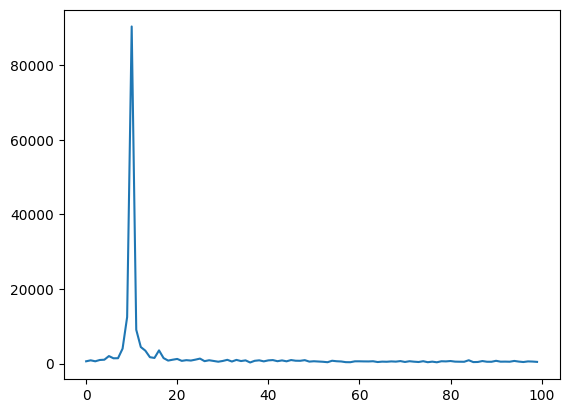

In [29]:
import matplotlib.pyplot as plt

print(evaluation.keys())

plt.plot(evaluation.get("noise_x_1_accuracy"))
